In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def show(img):
    plt.figure(figsize=(7,7))
    plt.imshow(img, cmap='gray')

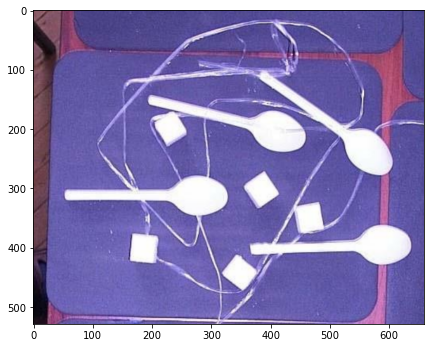

In [3]:
img = cv2.imread('image.png')[:,:,::-1]
show(img)

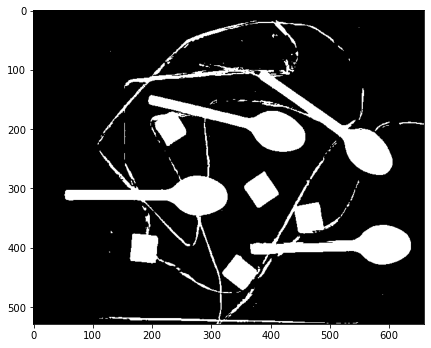

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, bin_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
show(bin_img)

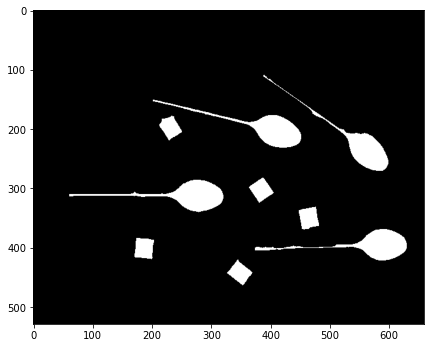

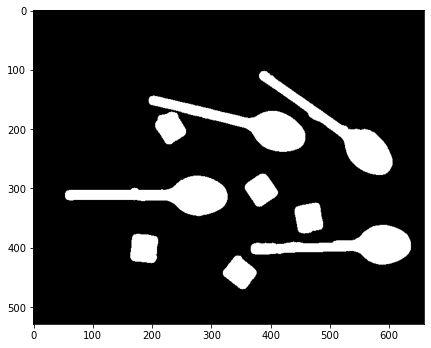

In [5]:
mask = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15,15))
erode = cv2.erode(bin_img, mask)
dilate = cv2.dilate(erode, mask)
show(erode)
show(dilate)

In [6]:
contours,_ = cv2.findContours(dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cntrs_area = []
for n in contours:
    area = cv2.contourArea(n)
    cntrs_area.append(area)
indices = np.array(cntrs_area).argsort()
sorted_area = sorted(cntrs_area)
print(f"{sorted_area} \n {indices}")
border_id = np.argmax(np.diff(sorted_area))+1
border_val = sorted_area[border_id]
print(f"{border_id}")

[1855.5, 1903.5, 1913.0, 1925.0, 1926.5, 7345.0, 7512.5, 7584.0, 7854.5] 
 [6 0 5 1 3 8 2 7 4]
5


In [7]:
spoons = indices[border_id:]
sugar = indices[:border_id]

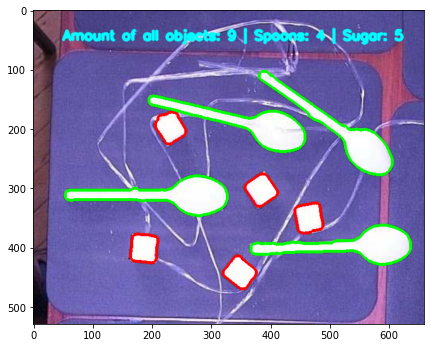

In [8]:
res = img.copy()
cv2.putText(res,f"Amount of all objects: {len(indices)} | Spoons: {len(spoons)} | Sugar: {len(sugar)}", (50,50), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 255), 3, cv2.LINE_AA)
cv2.drawContours(res, contours, 2, (0,255,0),3)
for i in indices:
    if i in spoons:
        cv2.drawContours(res, contours, i, (0,255,0), 3)
    else:
        cv2.drawContours(res, contours, i, (255,0,0), 3)
show(res)